# Exploring the damage threshold

For sufficientarian objectives, we need a damage threshold. Figuring out what value is appropriate will happen in this notebook.
---

## 1. Imports
First, we need some imports, and we need to set the current working directory straight.

In [1]:
import numpy as np

from model.pyrice import PyRICE
from model.enumerations import *

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.8)
sns.set_style("whitegrid")

## 2. Setting up model parameters

In [2]:
model_specification = ModelSpec.STANDARD
damage_function = DamageFunction.NORDHAUS
welfare_function = WelfareFunction.UTILITARIAN

model = PyRICE(model_specification=model_specification,
               damage_function=damage_function,
               welfare_function=welfare_function)

## 3. Visualizations of Pathways depending on several damage-thresholds

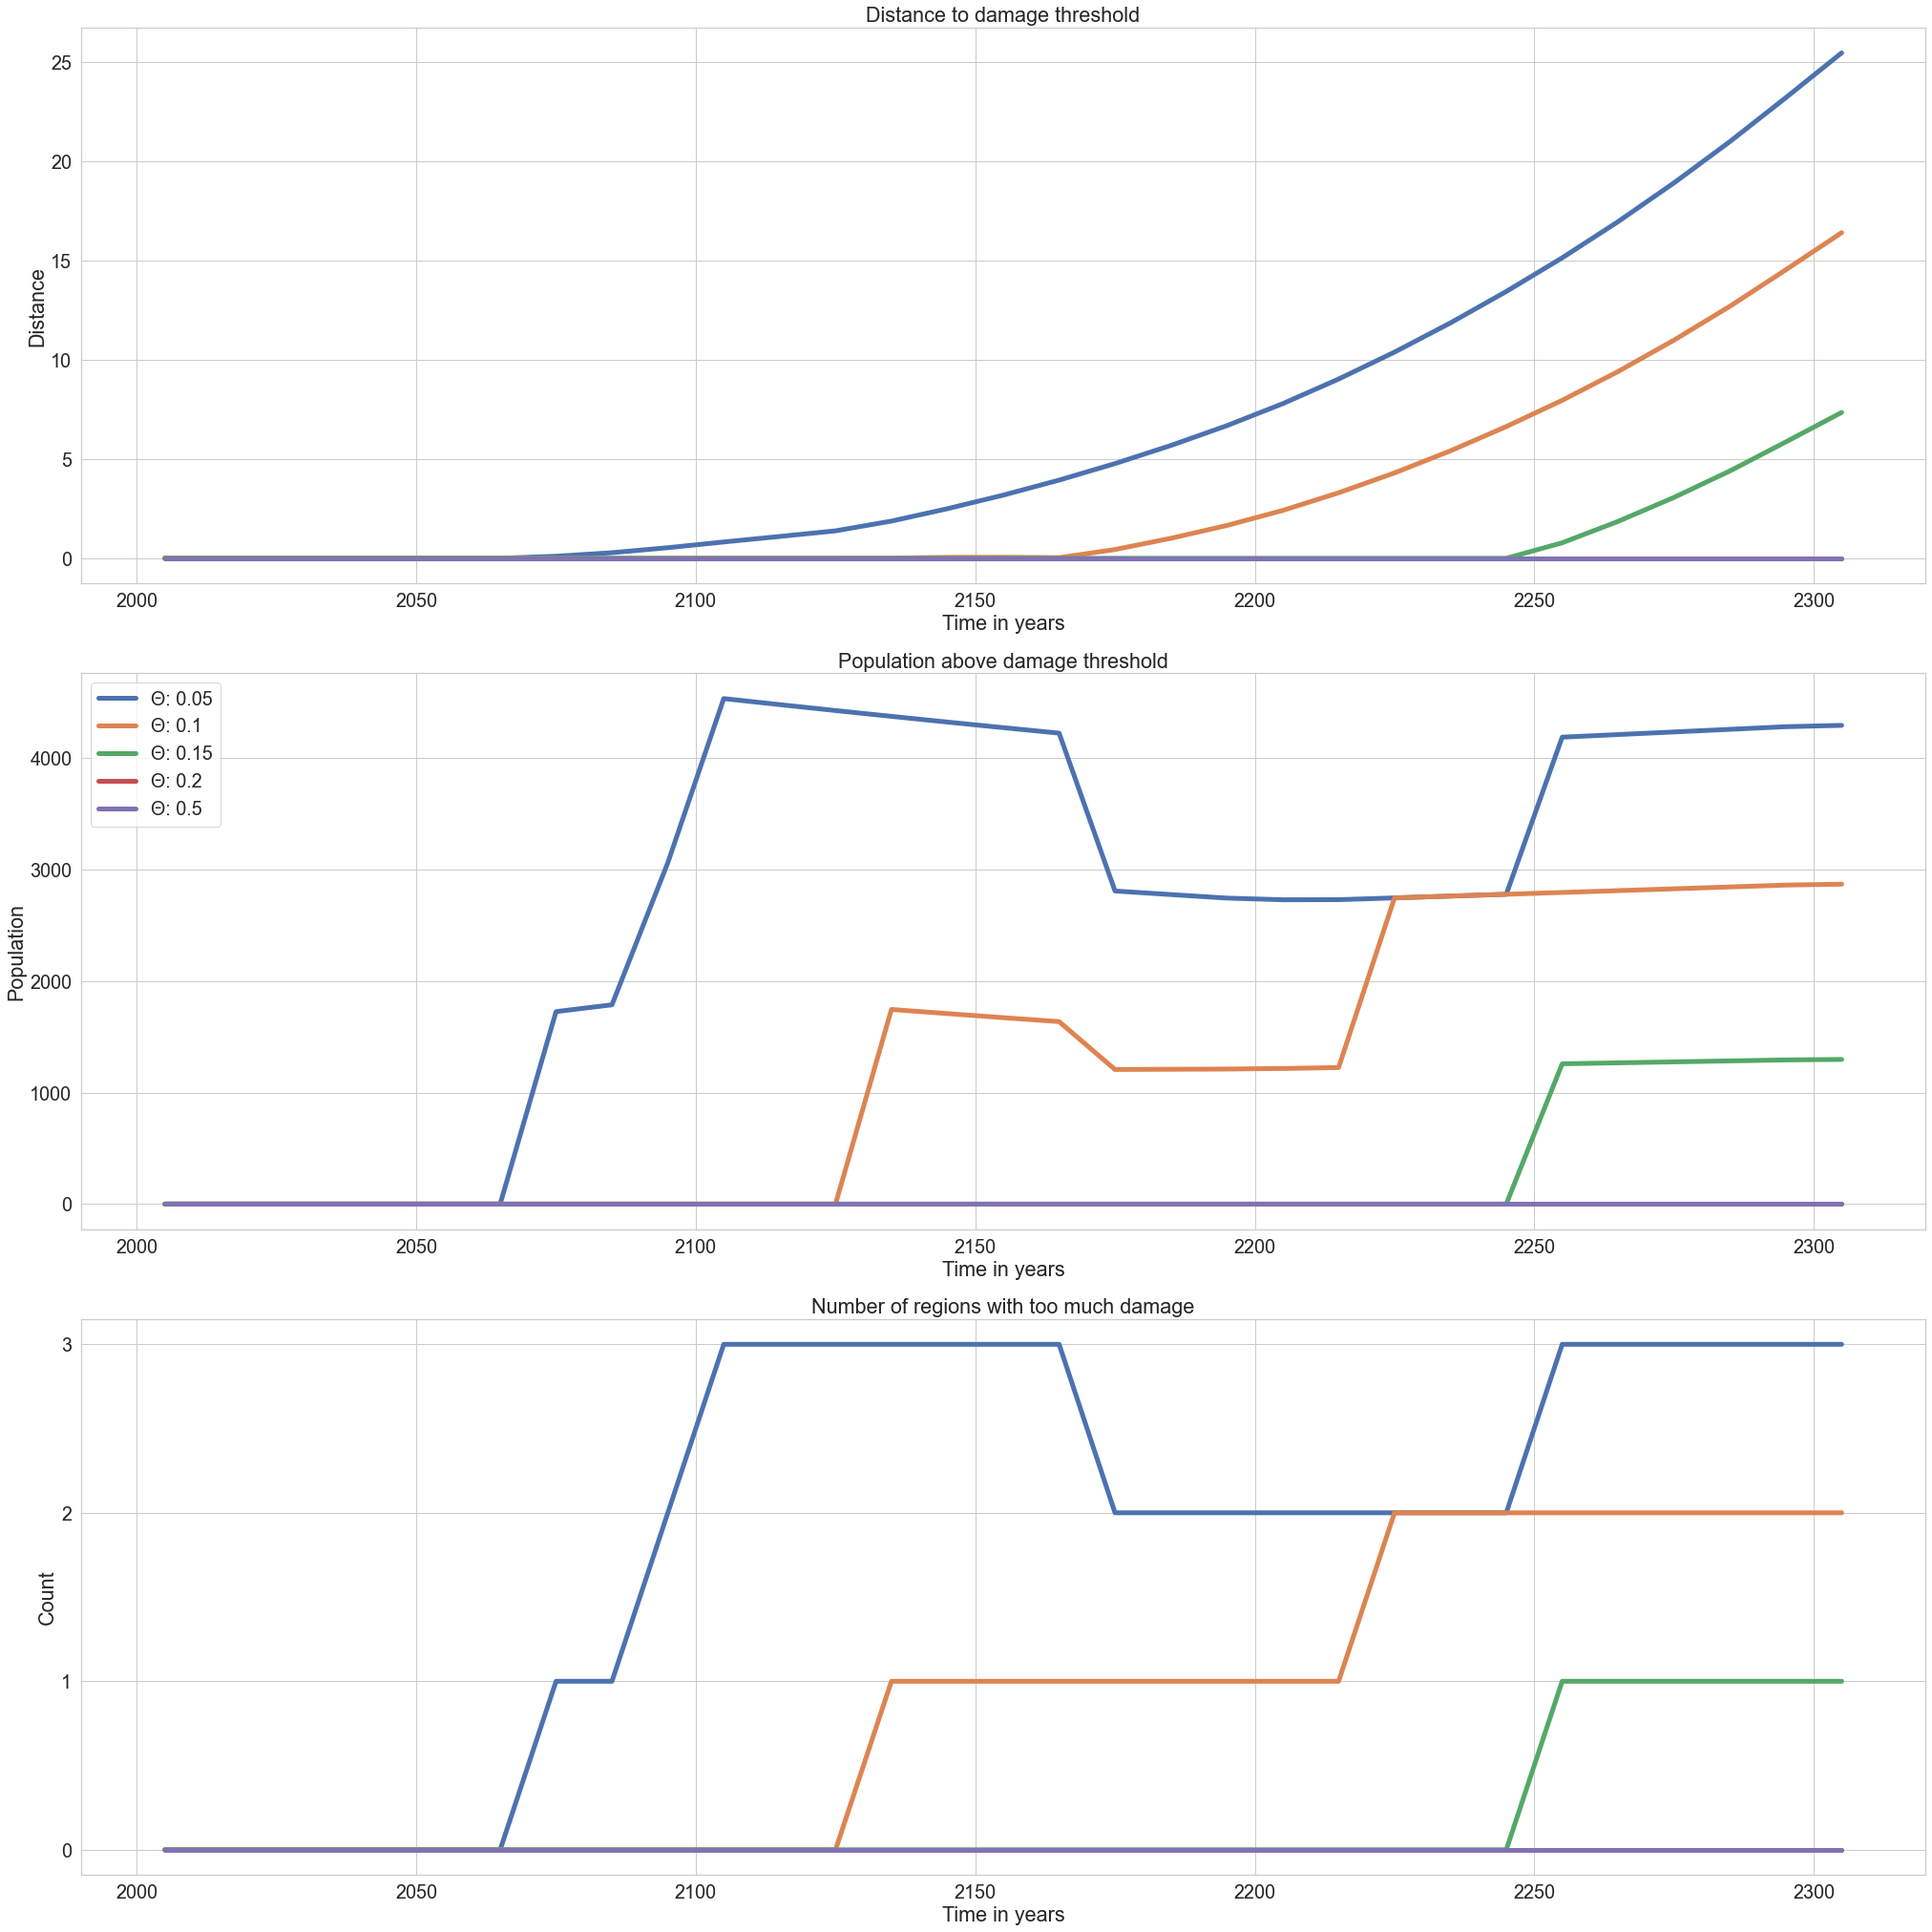

In [7]:
mosaic = """
    AA
    BB
    CC
    """

line_with = 5.0
fig = plt.figure(constrained_layout=True, figsize=(28, 28))
ax_dict = fig.subplot_mosaic(mosaic)

# Setting up several damage threshold values
# values = np.arange(0.01, 0.11, 0.01)
values = np.array([0.05, 0.1, 0.15, 0.2, 0.5])
years = np.arange(2005, 2310, 10)

for v in values:

    # Rounding
    v = round(v, 2)

    # Model run
    # results = model(relative_damage_threshold=threshold)
    results = model(relative_damage_threshold=v)

    results_formatted = model.get_better_formatted_results()

    # Plot the maximum distance to the damage threshold
    ax_dict["A"].plot(results_formatted.df_main.loc[:, 'Distance to damage threshold'], label=f'Θ: {v}', linewidth=line_with)
    ax_dict["A"].set_title('Distance to damage threshold')
    ax_dict["A"].set_xlabel('Time in years')
    ax_dict["A"].set_ylabel('Distance')

    # Plot population above damage threshold
    ax_dict["B"].plot(results_formatted.df_main.loc[:, 'Population above damage threshold'], label=f'Θ: {v}', linewidth=line_with)
    ax_dict["B"].set_title('Population above damage threshold')
    ax_dict["B"].set_xlabel('Time in years')
    ax_dict["B"].set_ylabel('Population')

    # Plot how many regions suffer too much damage
    nrs = []
    for regions in results_formatted.df_main.loc[:, 'Regions above damage threshold']:
        nrs.append(len(regions))

    ax_dict["C"].plot(years, nrs, label=f'Θ: {v}', linewidth=line_with)
    ax_dict["C"].set_title('Number of regions with too much damage')
    ax_dict["C"].set_xlabel('Time in years')
    ax_dict["C"].set_ylabel('Count')
    ax_dict["C"].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.show()